In [2]:
import SimpleITK as sitk
import sys
import os

In [ ]:
path = r"C:\Users\Alina\Desktop\diploma\test\00001.png"

In [22]:

# Считываем изображение из файла
input_image = sitk.ReadImage(path)

# Преобразуем считанное изображение в нужный формат
processed_image = sitk.Cast(input_image, sitk.sitkUInt16)

# Применяем GridSource к считанному изображению
grid_image = sitk.GridSource(
    outputPixelType=sitk.sitkUInt16,
    size=(512, 512),
    sigma=(0.1, 0.1),
    gridSpacing=(20.0, 20.0),
)

# Отображаем grid_image с использованием функции sitk.Show
sitk.Show(grid_image, title="grid using Show function", debugOn=True)

# Используем объектно-ориентированный интерфейс для отображения
image_viewer = sitk.ImageViewer()

# Используем считанное изображение processed_image для отображения
image_viewer.Execute(processed_image)

sitk.ProcessObject.SetGlobalDefaultNumberOfThreads(1)

os.system('C:/Users/Alina/Desktop/ImageJ/ImageJ.exe C:/Users/Alina/Desktop/diploma/test/00001.png')


# Задаем использование "Просмотр изображений Windows"
sitk.SetShowCommand("C:/Windows/System32/mspaint.exe")

# Отображаем изображение
sitk.Show(grid_image, title="grid using Show function", debugOn=True)


# sitk.SetShowCommand("C:/Users/Alina/Desktop/ImageJ/ImageJ.exe")

# # Отображаем изображение
# sitk.Show(grid_image, title="grid using Show function", debugOn=True)


# Изменяем приложение просмотра на ITK-SNAP и отображаем снова
image_viewer.SetApplication("/Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP")
image_viewer.Execute(processed_image)

# Изменяем командную строку приложения для отображения с опцией -z для увеличения
image_viewer.SetCommand("/Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP -z 2")
image_viewer.Execute(processed_image)

sys.exit(0)


RuntimeError: Exception thrown in SimpleITK Show: D:\a\1\sitk\Code\IO\src\sitkImageViewer.cxx:620:
sitk::ERROR: No ImageJ/Fiji application found.

In [37]:
main([r"C:\Users\Alina\Desktop\diploma\test\00001.png", r"C:/Users/Alina/Desktop/diploma/mask/01163.png", "output_image.png"])



RuntimeError: Exception thrown in SimpleITK ImageFileWriter_Execute: D:\a\1\sitk\Code\IO\src\sitkImageFileWriter.cxx:206:
sitk::ERROR: Unable to determine ImageIO writer for "1"

In [3]:
def main(pathin, pathout, shrinkFactor=1, pathmask=None, maxfittinglevels=None, numberFittingLevels=1):

    inputImage = sitk.ReadImage(pathin, sitk.sitkFloat32)
    image = inputImage

    if pathmask:
        maskImage = sitk.ReadImage(pathmask, sitk.sitkUInt8)
    else:
        maskImage = sitk.OtsuThreshold(inputImage, 0, 1, 120)


    if shrinkFactor > 1:
        image = sitk.Shrink(
            inputImage, [shrinkFactor] * inputImage.GetDimension()
        )
        maskImage = sitk.Shrink(
            maskImage, [shrinkFactor] * inputImage.GetDimension()
        )

    corrector = sitk.N4BiasFieldCorrectionImageFilter()

    if maxfittinglevels:
        corrector.SetMaximumNumberOfIterations(
            [int(maxfittinglevels)] * numberFittingLevels
        )

    corrected_image = corrector.Execute(image, maskImage)

    log_bias_field = corrector.GetLogBiasFieldAsImage(inputImage)

    corrected_image_full_resolution = inputImage / sitk.Exp(log_bias_field)

    sitk.WriteImage(corrected_image_full_resolution, str(pathout))


    if shrinkFactor > 1:
        sitk.WriteImage(
            corrected_image, "Python-Example-N4BiasFieldCorrection-shrunk.nrrd"
        )

    return_images = {"input_image": inputImage,
                     "mask_image": maskImage,
                     "log_bias_field": log_bias_field,
                     "corrected_image": corrected_image}
    return return_images


In [4]:
res = main(r"C:\Users\Alina\Desktop\diploma\test\00001.png", "N4_corrected.nrrd", numberFittingLevels=10)

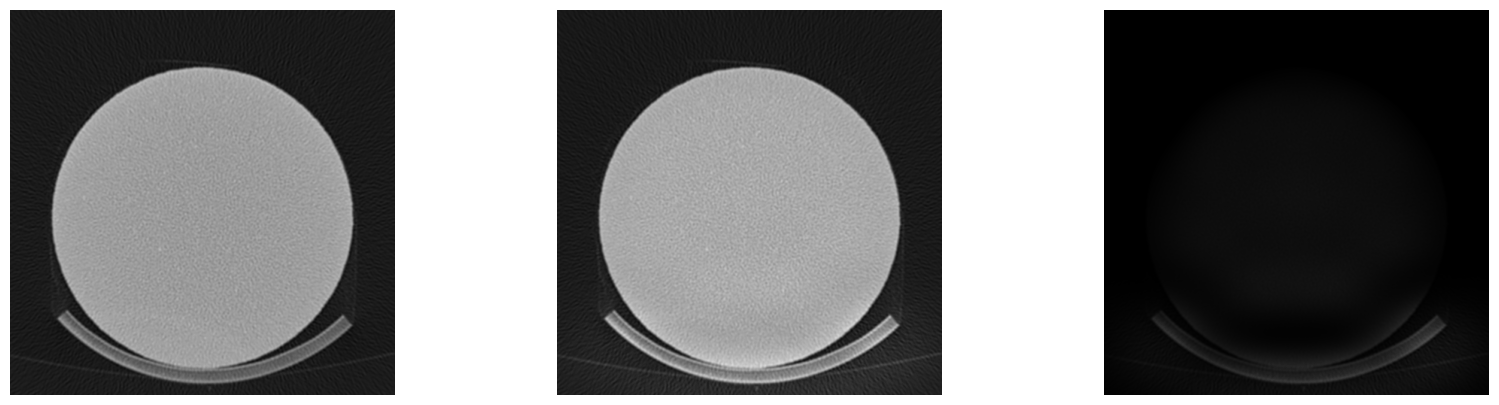

In [6]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    ax.set_axis_off()
axs[0].imshow(sitk.GetArrayViewFromImage(res["input_image"]), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(sitk.GetArrayViewFromImage(res["corrected_image"]), cmap='gray', vmin=0, vmax=255)
axs[2].imshow(sitk.GetArrayViewFromImage(res["corrected_image"]) - sitk.GetArrayViewFromImage(res["input_image"]), cmap='gray', vmin=0, vmax=255)
axs[3].imshow(sitk.GetArrayViewFromImage(res["mask_image"]), cmap='ocean', vmin=0, vmax=1)
plt.show()

In [ ]:
res2 = main(r"C:\Users\Alina\Desktop\diploma\test\00001.png", "N4_corrected.nrrd", numberFittingLevels=10)

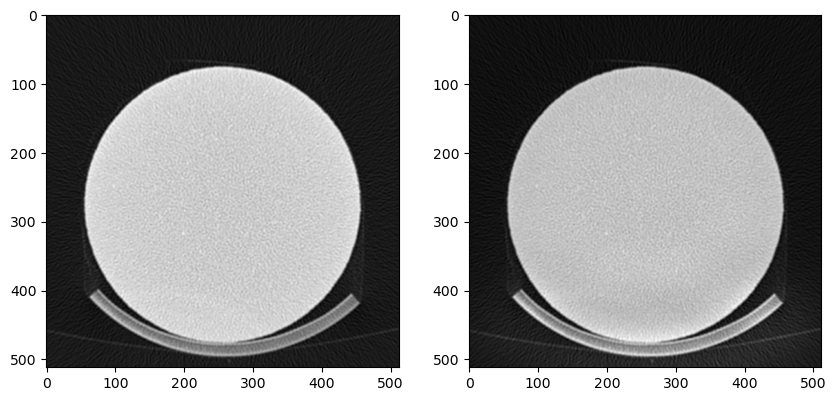

In [82]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(sitk.GetArrayViewFromImage(res["input_image"]), cmap='gray')
axs[1].imshow(sitk.GetArrayViewFromImage(res["corrected_image"]), cmap='gray')
plt.show()

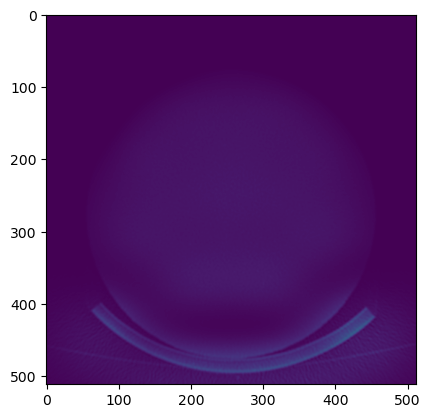

In [94]:
plt.imshow(sitk.GetArrayViewFromImage(res["corrected_image"]) - sitk.GetArrayViewFromImage(res["input_image"]), vmin=0, vmax=255)